In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce').fillna(0)

In [10]:
df.churn = (df.churn == 'yes').astype('int')

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Setting up the validation framework

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [14]:
len(df_test), len(df_full_train)

(1409, 5634)

In [15]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [16]:
len(df_test), len(df_val), len(df_train)

(1409, 1409, 4225)

In [17]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [18]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [19]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

## EDA

In [20]:
df_full_train = df_full_train.reset_index(drop = True)

In [21]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [22]:
df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [23]:
global_churn_rate = df_full_train.churn.mean()

In [24]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [25]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [26]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [27]:
df_full_train.multiplelines.value_counts()

multiplelines
no                  2700
yes                 2387
no_phone_service     547
Name: count, dtype: int64

In [28]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Risk Ratio

In [29]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])

In [30]:
from IPython.display import display

In [31]:
for c in categorical: 
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Mutual Information

In [32]:
from sklearn.metrics import mutual_info_score

In [33]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [34]:
def mutual_info_churn_score(series): 
    return mutual_info_score(df_full_train.churn, series)

In [35]:
df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Correlation

In [36]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [37]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [38]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure < 12) ].churn.mean()

np.float64(0.4059003051881994)

In [39]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

## One-Hot Encoding

In [40]:
from sklearn.feature_extraction import DictVectorizer

In [41]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [42]:
dv = DictVectorizer(sparse = False)

In [43]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [44]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [45]:
X_train = dv.fit_transform(train_dicts)

In [46]:
X_train.shape

(4225, 45)

In [47]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [48]:
X_val = dv.transform(val_dicts)

## Logistic Regression

In [49]:
import matplotlib.pyplot as plt

In [50]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [51]:
z = np.linspace(-7,7,51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

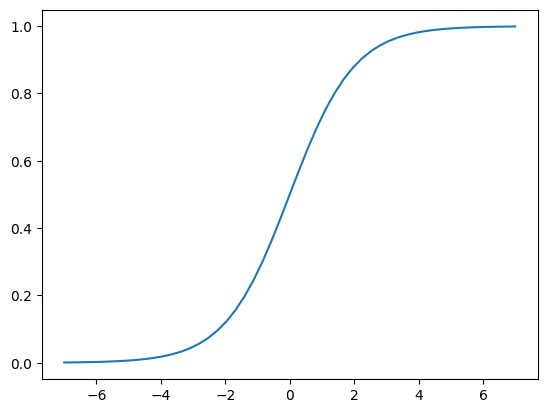

In [52]:
plt.plot(z, sigmoid(z))

In [53]:
def linear_regression(xi):
    result = w0 

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [54]:
def logistic_regression(xi):
    score = w0 

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

## Training logistic regression with scikit learn 

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [57]:
model.intercept_[0]

np.float64(-0.04544302938501822)

In [58]:
model.coef_[0].round(3)

array([ 0.686,  0.032, -0.678,  0.055, -0.015,  0.113, -0.16 ,  0.087,
        0.039,  0.001, -0.498,  0.698, -0.16 , -0.018, -0.188,  0.068,
        0.159,  0.117, -0.16 ,  0.083,  0.284, -0.16 , -0.085, -0.161,
        0.201, -0.044,  0.084, -0.053, -0.002,  0.107, -0.011,  0.068,
       -0.028,  0.195, -0.095, -0.16 ,  0.295, -0.055, -0.16 ,  0.255,
        0.234, -0.16 , -0.034, -0.068,  0.   ])

In [59]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [60]:
y_pred = model.predict_proba(X_val)[:,1]

In [61]:
churn_decision = (y_pred >= 0.5)

In [62]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [63]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

## Model Interpretation

In [64]:
model.coef_[0].round(3)

array([ 0.686,  0.032, -0.678,  0.055, -0.015,  0.113, -0.16 ,  0.087,
        0.039,  0.001, -0.498,  0.698, -0.16 , -0.018, -0.188,  0.068,
        0.159,  0.117, -0.16 ,  0.083,  0.284, -0.16 , -0.085, -0.161,
        0.201, -0.044,  0.084, -0.053, -0.002,  0.107, -0.011,  0.068,
       -0.028,  0.195, -0.095, -0.16 ,  0.295, -0.055, -0.16 ,  0.255,
        0.234, -0.16 , -0.034, -0.068,  0.   ])

In [65]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.686),
 'contract=one_year': np.float64(0.032),
 'contract=two_year': np.float64(-0.678),
 'dependents=no': np.float64(0.055),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.113),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.087),
 'gender=female': np.float64(0.039),
 'gender=male': np.float64(0.001),
 'internetservice=dsl': np.float64(-0.498),
 'internetservice=fiber_optic': np.float64(0.698),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.188),
 'multiplelines=no_phone_service': np.float64(0.068),
 'multiplelines=yes': np.float64(0.159),
 'onlinebackup=no': np.float64(0.117),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.083),
 'onlinesecurity=no': np.float64(0.284),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.flo

In [66]:
small = ['contract', 'tenure', 'monthlycharges']

In [67]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [68]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [69]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [70]:
X_train_small = dv.fit_transform(dicts_train_small)

In [71]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595284362)

In [73]:
w = model_small.coef_[0].round(3)
w

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [74]:
dict(zip(dv_small.get_feature_names_out(), w))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [75]:
-2.47 - 0.948 + 150 * 0.027 + 24 * (-0.036)

-0.2320000000000002

In [76]:
sigmoid(_)

np.float64(0.44225875669050996)

## Using the model

In [77]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [78]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [79]:
y_full_train = df_full_train.churn.values

In [80]:
model = LogisticRegression(max_iter=10000)
model.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [81]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [82]:
y_pred = model.predict_proba(X_test)[:,1]

In [83]:
churn_decision = (y_pred >= 0.5)

In [84]:
(churn_decision == y_test).mean()

np.float64(0.8097941802696949)

In [85]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [86]:
y_pred[10]

np.float64(0.47693536083169163)

# 04-Evaluation

## Accuracy

In [87]:
y_pred = model.predict_proba(X_val)[:,1]

In [88]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [89]:
scores = []

for t in thresholds: 
    
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.610
0.15 0.662
0.20 0.710
0.25 0.746
0.30 0.766
0.35 0.773
0.40 0.787
0.45 0.796
0.50 0.806
0.55 0.813
0.60 0.803
0.65 0.791
0.70 0.776
0.75 0.742
0.80 0.732
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


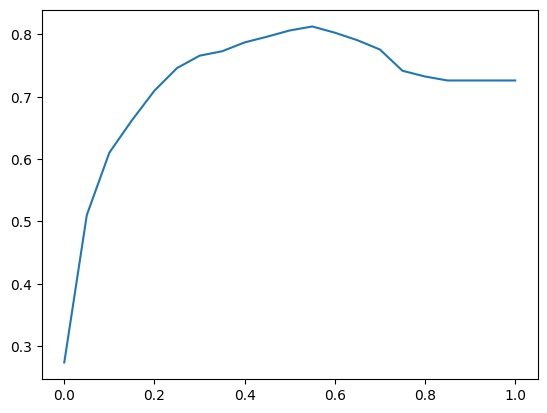

In [90]:
plt.plot(thresholds, scores)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_val, y_pred >= 0.5)

0.8062455642299503

In [93]:
scores = []

for t in thresholds: 
    
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.610
0.15 0.662
0.20 0.710
0.25 0.746
0.30 0.766
0.35 0.773
0.40 0.787
0.45 0.796
0.50 0.806
0.55 0.813
0.60 0.803
0.65 0.791
0.70 0.776
0.75 0.742
0.80 0.732
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


## Confusion Matrix

In [94]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [95]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [96]:
tp = (actual_positive & predict_positive).sum()

In [97]:
tn = (actual_negative & predict_negative).sum()

In [98]:
fn = (actual_positive & predict_negative).sum()

In [99]:
fp = (actual_negative & predict_positive).sum()

In [100]:
confusion_matric = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matric

array([[921, 102],
       [171, 215]])

In [101]:
(confusion_matric / confusion_matric.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision and Recall

In [102]:
p = tp / (tp + fp) 
## how many we guessed correctly; 
## if precision is 100% all our guesses are correct but it might be that we only flag very obvious cases

In [103]:
p

np.float64(0.6782334384858044)

In [104]:
r = tp / (tp + fn) 
## how many we guess out of total actual positives; 
## if recall is 100% we covered all actual positives BUT it might be that we just flag everyone
r

np.float64(0.5569948186528497)

## ROC Curves

In [105]:
tpr = tp / (tp + fn) ## this we want to maximize
tpr

np.float64(0.5569948186528497)

In [106]:
fpr = fp / (tn + fp) 
## this we want to minimize; 
## out of total negatives how many we flagged as positives; if we try to maximise recall aka tpr we can just flag everyone as 1; \
## but then fpr will be high as well 
fpr

np.float64(0.09970674486803519)

In [107]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fn = (actual_positive & predict_negative).sum()
    fp = (actual_negative & predict_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [108]:
columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)

In [109]:
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,368,531,18,492
20,0.2,339,362,47,661
30,0.3,302,246,84,777
40,0.4,259,173,127,850
50,0.5,215,102,171,921
60,0.6,157,49,229,974
70,0.7,84,14,302,1009
80,0.8,9,0,377,1023
90,0.9,0,0,386,1023


In [110]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

In [111]:
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,368,531,18,492,0.953368,0.519062
20,0.2,339,362,47,661,0.878238,0.353861
30,0.3,302,246,84,777,0.782383,0.240469
40,0.4,259,173,127,850,0.670984,0.169110
50,0.5,215,102,171,921,0.556995,0.099707
60,0.6,157,49,229,974,0.406736,0.047898
70,0.7,84,14,302,1009,0.217617,0.013685
80,0.8,9,0,377,1023,0.023316,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


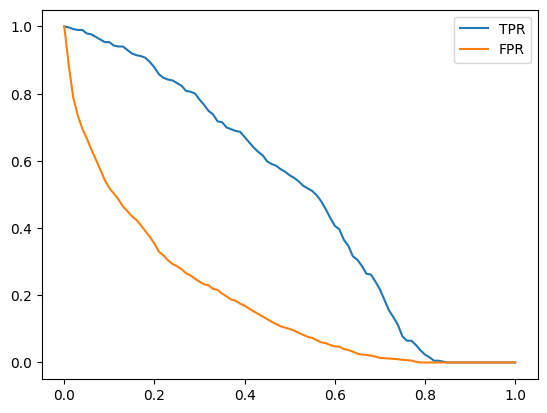

In [112]:
plt.plot(thresholds, df_scores['tpr'], label = 'TPR')
plt.plot(thresholds, df_scores['fpr'], label = 'FPR')
plt.legend()

## Random Model

In [113]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size = len(y_val))

In [114]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [115]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0,1,101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()
        fn = (actual_positive & predict_negative).sum()
        fp = (actual_negative & predict_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
    
    columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores

In [116]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [117]:
df_rand[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


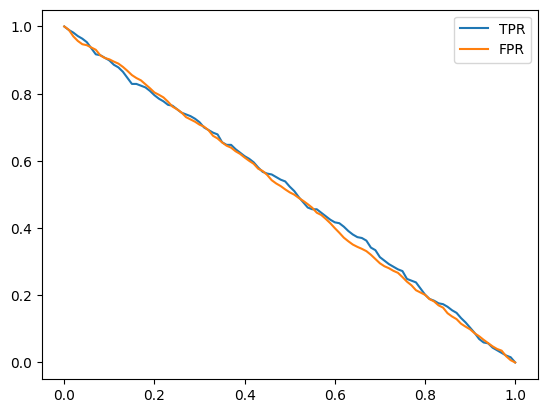

In [118]:
plt.plot(thresholds, df_rand['tpr'], label = 'TPR')
plt.plot(thresholds, df_rand['fpr'], label = 'FPR')
plt.legend()

## Ideal Model

In [119]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [120]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])

In [121]:
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [122]:
y_ideal_pred = np.linspace(0,1,len(y_val))

In [123]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [124]:
((y_ideal_pred >= 1 - y_val.mean()) == y_ideal).mean()

np.float64(1.0)

In [125]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

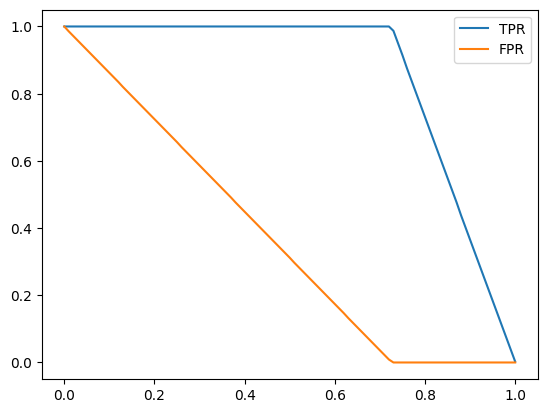

In [126]:
plt.plot(thresholds, df_ideal['tpr'], label = 'TPR')
plt.plot(thresholds, df_ideal['fpr'], label = 'FPR')
plt.legend()

## Putting Everything Together 

Text(0, 0.5, 'TPR')

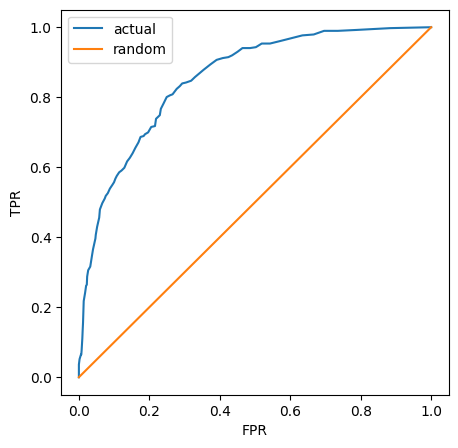

In [127]:
plt.figure(figsize = (5,5))

#plt.plot(df_ideal['fpr'], df_ideal['tpr'], label = 'ideal', color = 'black')
plt.plot(df_scores['fpr'], df_scores['tpr'], label = 'actual')
plt.plot([0,1], [0,1], label = 'random')

#plt.plot(df_rand['fpr'], df_rand['tpr'], label = 'random')
plt.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')

In [128]:
from sklearn.metrics import roc_curve

In [129]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Text(0, 0.5, 'TPR')

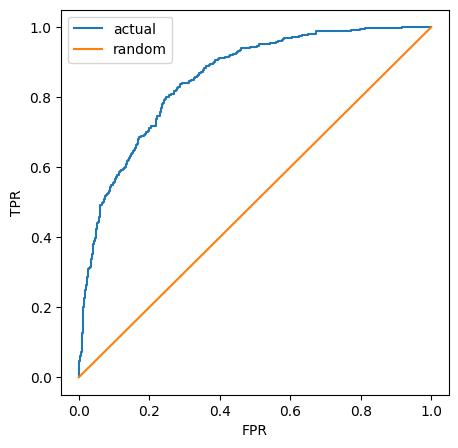

In [130]:
plt.figure(figsize = (5,5))

#plt.plot(df_ideal['fpr'], df_ideal['tpr'], label = 'ideal', color = 'black')
plt.plot(fpr, tpr, label = 'actual')
plt.plot([0,1], [0,1], label = 'random')

#plt.plot(df_rand['fpr'], df_rand['tpr'], label = 'random')
plt.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')

## ROC AUC

In [131]:
from sklearn.metrics import auc

In [132]:
auc(fpr, tpr)

0.8530938669665061

In [133]:
auc(df_scores.fpr, df_scores.tpr)

0.8526633542511863

In [134]:
from sklearn.metrics import roc_auc_score

In [135]:
roc_auc_score(y_val, y_pred)

0.8530938669665061

In [136]:
## auc - probability that randomly selected positive example has a higher score than a randomly selected negative example
## or how well we can order examples

In [137]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [138]:
import random

In [143]:
n = 100000
success = 0

for i in range(n):

    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.85197

In [146]:
pos_ind = np.random.randint(0, len(pos), size = 100000)
neg_ind = np.random.randint(0, len(neg), size = 100000)

In [147]:
(pos[pos_ind] >= neg[neg_ind]).mean()

np.float64(0.85265)

## Cross Validation

In [187]:
def train(df, y_train):
    dicts = df[categorical + numerical].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)

    return dv, model

In [188]:
dv, model = train(df_train, y_train)

In [189]:
def predict(df, dv, model): 
    dicts = df[categorical + numerical].to_dict(orient = 'records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [190]:
y_pred = predict(df_val, dv, model)

In [191]:
from sklearn.model_selection import KFold

In [192]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [171]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [170]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred) 

    scores.append(auc)

In [173]:
np.mean(scores), np.std(scores)

(np.float64(0.8424845163064638), np.float64(0.011673833308340029))

In [193]:
dv, model = train(df_full_train, df_full_train.churn.values)

In [194]:
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred) 
auc

0.8583517501381259

In [166]:
df_full_train.iloc[train_idx]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,2250-ivbwa,male,0,yes,yes,64,yes,no,fiber_optic,yes,...,no,no,no,no,month-to-month,no,electronic_check,81.05,5135.35,0
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1
